<!-- <div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>CREDIT CARD FRAUD DETECTION</span></b></b></p>
</div> -->

## Probability of default by machine learning model

<!-- <center>
    <img src="https://miro.medium.com/max/800/1*MZ0Qqk7xtHdvJJbUTu_1CQ.jpeg" alt="Credit Card Fraud Detection" width="50%">
</center> -->

### **Problem Statement :**

Credit Card Frauds are the cases of using someone else's credit cards for financial transactions without the information of the card owner. Credit Cards were made available inorder for the people to increase their buying power, it is an agreement with your bank that lets the user use the money lended by the bank in exchange for the repayment of this lended money on the due date or incur interest charges. With the rise in the e-commerce and the recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. As all the things in the nature are binary, cases of credit card frauds has also achieved high numbers. Global economy pays the price of more than \\$ 24 billion per year due to these frauds. Thus, it becomes essential to solve this problem and as a result a lot of startups have been born into this \\$ 30 billion industry. Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!     

### **Aim :**
- To classify whether a credit card transaction is fradulent or genuine and handle unbalanced dataset.
- It is a **binary classification** problem with highly unbalanced data.

### <center>**Dataset Attributes**</center>
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

### **Notebook Contents :**
- Dataset Information
- Data Visualization
- Feature Selection
- Data Balancing
- Modeling
- Conclusion

### **What you will learn :**
- Data Balancing using SMOTE.
- Statistical Tests for Feature Selection.
- Model comparison based on features selected based on statistical tests. 
- Modeling and visualization of results for algorithms.

<!-- ### **Related Work :**

- [Binary Classification](https://www.kaggle.com/competitions/titanic/discussion/352223) **: It is a discussion post that describes the approach required to deal with Binary Classification problems explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Time Series Analysis](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/352205) **: It is a discussion post that describes the basics of Time Series Analysis explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Unsupervised Learning](https://www.kaggle.com/code/tanmay111999/mall-customer-segmentation-k-means-eda) **:It is a notebook that describes the work on Unsupervised Learning problem using K-Means clustering algorithm!** -->

### **Lets get started!**

### **Import the Necessary Libraries :**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [61]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### **Data Info :**

In [62]:
data.shape

(284807, 31)

In [63]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- **No null values** present in the data!

In [65]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


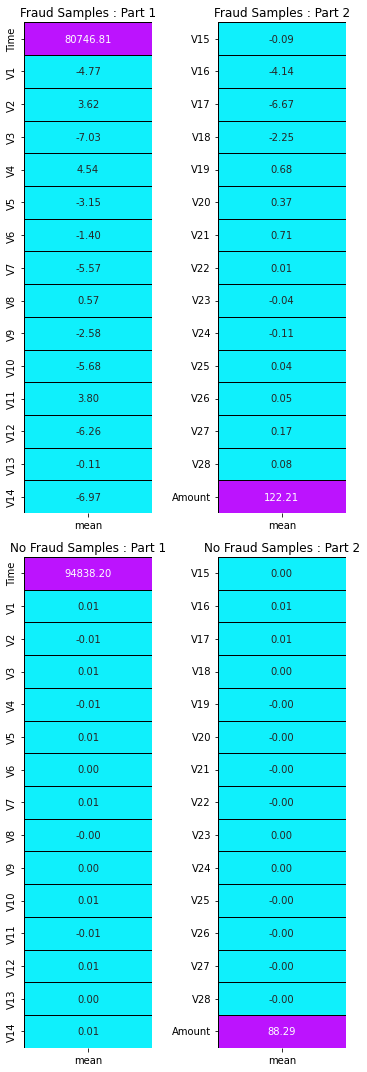

In [66]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#0FF0FC','#BC13FE']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

- **Mean** values of features for **Fraud** & **No Fraud** cases!
- For **No Fraud** cases, **V1 - V28** mean values are almost **0** for all the cases. Mean **Amount**, 88.29, is less than the mean transaction amount, 122.21, of the **Fraud** cases.
- **Time** taken for **No Fraud** transactions is more than those for **Fraud** transactions.
- These could be some of the indicators for detecting **fraud** transactions.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>VISUALS</span></b></b></p>
</div>

### **Target Variable Visualization (Class) :** 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


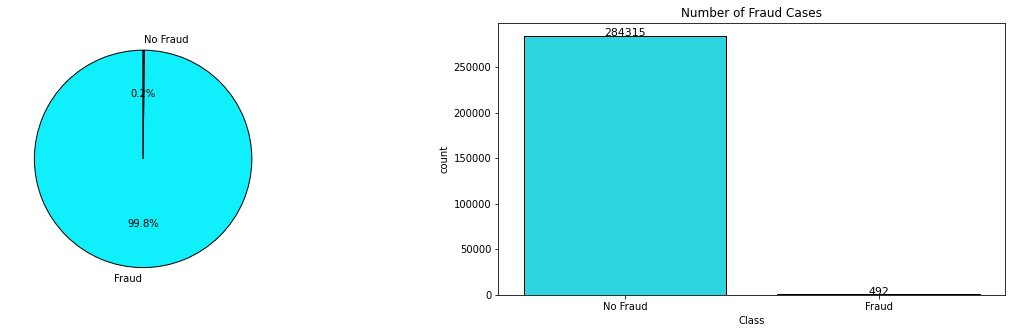

In [67]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot('Class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>FEATURE SELECTION</span></b></b></p>
</div>

### **Correlation Matrix :**

<AxesSubplot:>

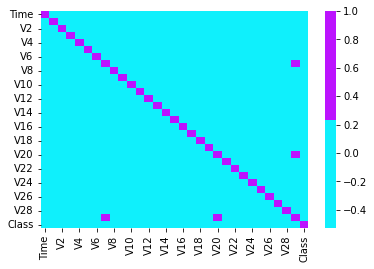

In [68]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

- There are too many features in the dataset and it is difficult to understand anything. 
- Hence, we will plot the correlation map only with the target variable.

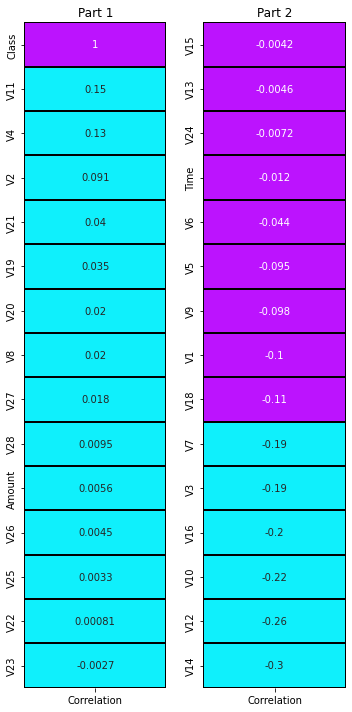

In [69]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

- For feature selection, we will **exclude** the features having correlation values between **[-0.1,0.1]**.
- V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the **Class** feature.

### ANOVA Test : 

* ANOVA, which stands for Analysis of Variance. An ANOVA test is a way to find out if survey or experiment results are significant.**

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

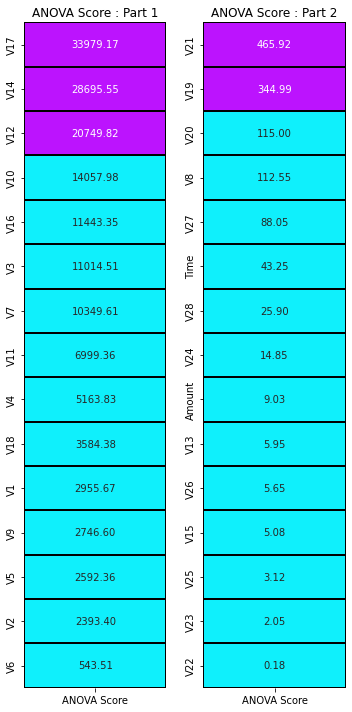

In [71]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the **Correlation Plot** & **ANOVA Score**.

### **Dataset for Model based on Correlation Plot :**

In [72]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


#### **Dataset for Model based on ANOVA Score :**

In [73]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>BALANCING DATA</span></b></b></p>
</div>

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

In [74]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### **Data Balancing for Model based on Correlation Plot :**

In [75]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

#### **Data Balancing for Model based on ANOVA Score :**

In [76]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

### **Calculation for Data Balancing :**

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Fraud Cases** : 284315 samples
    - **Minority Class : Fraud Cases** : 492 samples


### **Undersampling : Trim down the majority class samples**

- Sampling_Strategy = 0.1
- 0.1 = ( 492 ) / Majority Class Samples
- After undersampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 492 samples


### **Oversampling : Increase the minority class samples**

- Sampling_Strategy = 0.5
- 0.5 = ( Minority Class Samples ) / 4920
- After oversampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples
    

- **Final Class Samples :**

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples


- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>MODEL BUILDING</span></b></b></p>
</div>

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [78]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Splitting the data into **80 - 20 train - test** groups.

In [79]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    pd = classifier.predict_proba(x_test)[0:10,1]
    print('probability of default',pd)
    print('original test value', y_test[0:10])
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### Logistic Regression 

probability of default [0.0257004  0.99995745 0.99999998 0.0157778  0.04463537 0.9997425
 1.         0.04000247 0.00909615 0.00735603]
original test value [0 1 1 0 0 1 1 0 0 0]
Cross Validation Score :  98.35%
ROC_AUC Score :  93.15%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


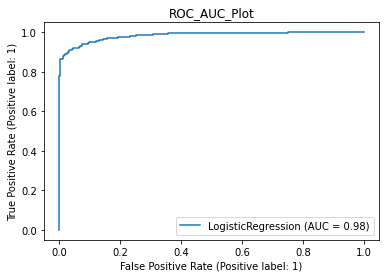

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



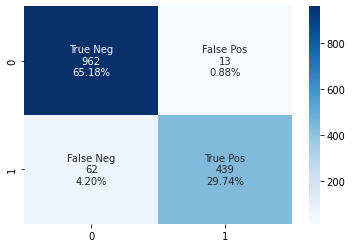

In [80]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train1,y_train1)
probability_default = logreg.predict_proba(x_test1)[0:10,1]
print(probability_default)
print(y_test1[0:10])

[0.02533467 0.99993785 0.99999997 0.01570859 0.04484657 0.99965718
 1.         0.04013835 0.00927307 0.00746789]
[0 1 1 0 0 1 1 0 0 0]


#### **ANOVA Score :**

probability of default [0.0180562  0.99967645 0.9996542  0.00890837 0.01536171 0.99961121
 0.63483266 0.01574835 0.03044825 0.01926614]
original test value [0 1 1 0 0 1 1 0 0 0]
Cross Validation Score :  98.33%
ROC_AUC Score :  93.09%


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


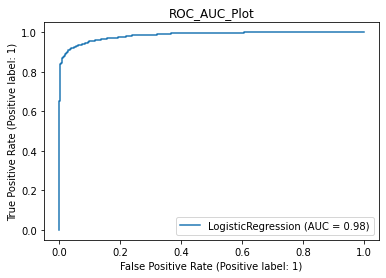

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.97      0.88      0.92       501

    accuracy                           0.95      1476
   macro avg       0.95      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



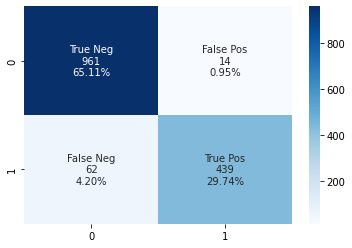

In [82]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### Support Vector Classifier

In [83]:
from sklearn.svm import SVC

In [84]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [85]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

AttributeError: predict_proba is not available when  probability=False

#### **ANOVA Score :**

In [ ]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [ ]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

#### **ANOVA Score :**

In [ ]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

### Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [ ]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

#### **ANOVA Score :**

In [ ]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

### K-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

In [ ]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

#### **ANOVA Score :**

In [ ]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

### **ML Alogrithm Results Table :**

#### **Results Table for models based on Confusion matrix :** 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.01%|92.35%|91%|
|2|Support Vector Classifier|97.94%|92.10%|91%|
|3|Decision Tree Classifier|96.67%|91.36%|90%|
|4|Random Forest Classifier|97.84%|91.71%|91%|
|5|K-Nearest Neighbors|99.34%|97.63%|97%|
 
#### **Results Table for models based on ANOVA Score :**

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.45%|94.69%|94%|
|2|Support Vector Classifier|98.32%|94.40%|94%|
|3|Decision Tree Classifier|97.13%|93.69%|93%|
|4|Random Forest Classifier|98.20%|94.06%|94%|
|5|K-Nearest Neighbors|99.54%|98.47%|97%|

<!-- <div style="color:white;display:fill;border-radius:8px;
            background-color:#CCFF00;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1562C1'>CONCLUSION</span></b></b></p>
</div> -->
### Conclusion

- This is a great dataset to learn about binary classification problem with unbalanced data.


- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.  


- Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.